In [2]:
###################################### IMPORTING LIBRARIES ###

import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
import awkward as ak
import pandas as pd
import numpy as np
import uproot
import yaml
import sys
import os

sys.path.append(os.path.abspath('../scripts'))

from tqdm import tqdm

In [6]:
################################### LOADING CONFIGURATION ###

with open('../config/config.yaml') as conf_file:
    config = yaml.load(conf_file, Loader=yaml.Loader)
    exec(config['plot_style']['light'])

muonMass = config['mass']['muon']
electronMass = config['mass']['elec']
ZbosonMass = config['mass']['Zboson']
WbosonMass = config['mass']['Wboson']

In [8]:
########################################### LOADING TREES ###

signal_file_path = '../data_profe/signal.root'

tree_signal = uproot.open(signal_file_path)['Delphes']

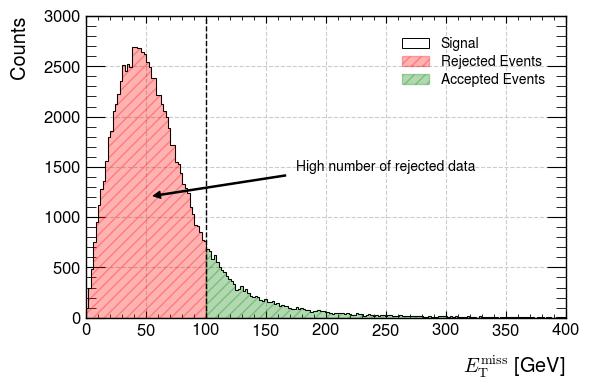

In [184]:
###################### PLOTTING MISSING TRANSVERSE ENERGY ###

fig, ax = plt.subplots(figsize=(6, 4))

missET_signal = np.hstack(tree_signal['MissingET/MissingET.MET'].arrays(library='np')['MissingET.MET'])
bins = np.linspace(0, 400, 200)

h, b, _ = plt.hist(missET_signal, bins=bins, histtype='step', color='k', label='Signal', lw=0.7)
plt.fill_between(b[:-1][:51], h[:51], hatch='///', color='r', alpha=0.3, ec='r', label='Rejected Events', step="post")
plt.fill_between(b[:-1][50:], h[50:], hatch='///', color='g', alpha=0.3, ec='g', label='Accepted Events', step="post")
plt.axvline(100, ls='--', lw=1, color='k')
plt.legend()
plt.ylabel('Counts')
plt.xlabel(r'$E_\text{T}^\text{miss}$ [GeV]')

plt.annotate('High number of rejected data', xy=(50, 1200), xytext=(175, 1500), va='center',
            arrowprops=dict(facecolor='black', shrink=0.05, width=0.8, headwidth=5, headlength=5))

#plt.show()

plt.tight_layout()
plt.savefig('../../../Desktop/MET_raw.png', format='png')

# Done

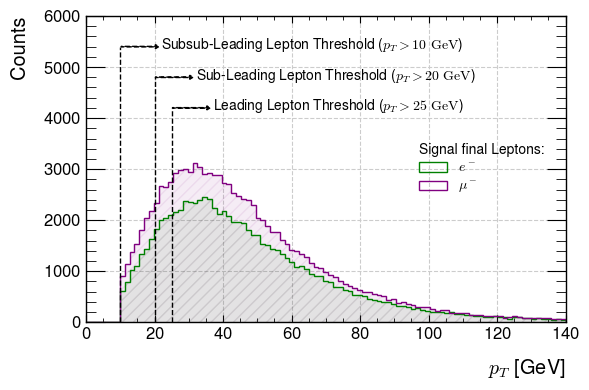

In [185]:
elecs_pt = np.hstack(tree_signal['Electron/Electron.PT'].arrays(library='np')['Electron.PT'])
muons_pt = np.hstack(tree_signal['Muon/Muon.PT'].arrays(library='np')['Muon.PT'])

fig, ax = plt.subplots(figsize=(6, 4))

bins = np.linspace(0, 140, 100)

h, b, _ = plt.hist(elecs_pt, bins=bins, histtype='step', color='green', label=r'$e^-$')
plt.fill_between(b[:-1], h, hatch='///', color='green', alpha=0.075, ec='green', step="post")
h, b, _ = plt.hist(muons_pt, bins=bins, histtype='step', color='purple', label=r'$\mu^-$')
plt.fill_between(b[:-1], h, hatch='///', color='purple', alpha=0.075, ec='purple', step="post")

plt.axvline(25, ymin=0, ymax=0.7, ls='--', lw=1, color='k')
plt.arrow(25+.25, 4200, 10, 0, width=10, head_width=80, head_length=1, ls='--', fc='k', lw=1)
plt.text(25+10 +2, 4200 -50, r'Leading Lepton Threshold ($p_T > 25 \text{ GeV}$)')

plt.axvline(20, ymin=0, ymax=0.8, ls='--', lw=1, color='k')
plt.arrow(20+.25, 4800, 10, 0, width=10, head_width=80, head_length=1, ls='--', fc='k', lw=1)
plt.text(20+10 +2, 4800 -50, r'Sub-Leading Lepton Threshold ($p_T > 20 \text{ GeV}$)')

plt.axvline(10, ymin=0, ymax=0.9, ls='--', lw=1, color='k')
plt.arrow(10+.25, 5400, 10, 0, width=10, head_width=80, head_length=1, ls='--', fc='k', lw=1)
plt.text(10+10 +2, 5400 -50, r'Subsub-Leading Lepton Threshold ($p_T > 10 \text{ GeV}$)')

plt.legend(title='Signal final Leptons:', alignment='left', loc='center right')
plt.ylabel('Counts')
plt.xlabel(r'$p_T$ [GeV]')
plt.ylim(0, 6000)

plt.tight_layout()
plt.savefig('../../../Desktop/PT_raw.png', format='png')

# Done

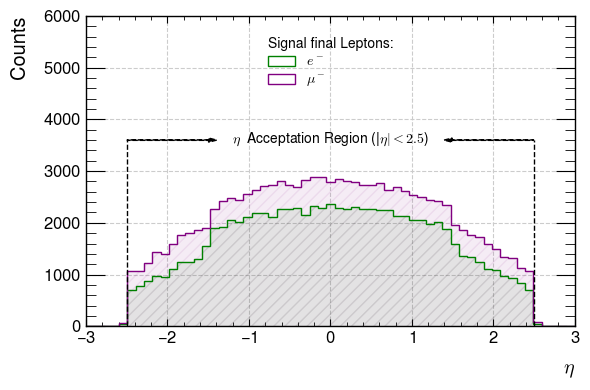

In [186]:
elecs_eta = np.hstack(tree_signal['Electron/Electron.Eta'].arrays(library='np')['Electron.Eta'])
muons_eta = np.hstack(tree_signal['Muon/Muon.Eta'].arrays(library='np')['Muon.Eta'])

fig, ax = plt.subplots(figsize=(6, 4))

bins = np.linspace(-3, 3, 60)

h, b, _ = plt.hist(elecs_eta, bins=bins, histtype='step', color='green', label=r'$e^-$')
plt.fill_between(b[:-1], h, hatch='///', color='green', alpha=0.075, ec='green', step="post")
h, b, _ = plt.hist(muons_eta, bins=bins, histtype='step', color='purple', label=r'$\mu^-$')
plt.fill_between(b[:-1], h, hatch='///', color='purple', alpha=0.075, ec='purple', step="post")

plt.axvline(-2.5, ymin=0, ymax=0.6, ls='--', lw=1, color='k')
plt.arrow(-2.5+0.005, 3600, 1, 0, width=10, head_width=80, head_length=0.1, ls='--', fc='k', lw=1)

plt.axvline(2.5, ymin=0, ymax=0.6, ls='--', lw=1, color='k')
plt.arrow(2.5-0.005, 3600, -1, 0, width=10, head_width=80, head_length=0.1, ls='--', fc='k', lw=1)

plt.text(0, 3600 -50, r'$\eta$  Acceptation Region (|$\eta| < 2.5$)', ha='center')

plt.legend(title='Signal final Leptons:', alignment='left', loc='upper center')
plt.ylabel('Counts')
plt.xlabel(r'$\eta$')
plt.ylim(0, 6000)

plt.tight_layout()
plt.savefig('../../../Desktop/Eta_raw.png', format='png')

# Done

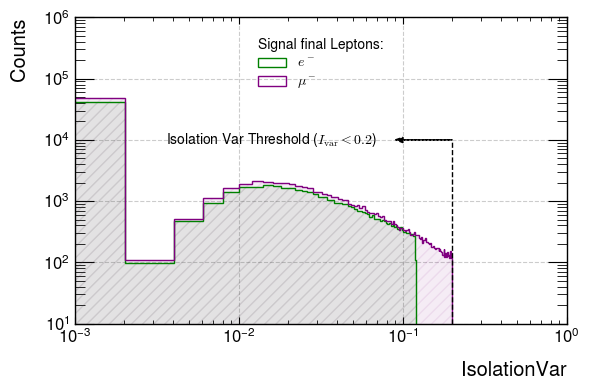

In [187]:
elecs_ivar = np.hstack(tree_signal['Electron/Electron.IsolationVar'].arrays(library='np')['Electron.IsolationVar'])
muons_ivar = np.hstack(tree_signal['Muon/Muon.IsolationVar'].arrays(library='np')['Muon.IsolationVar'])

fig, ax = plt.subplots(figsize=(6, 4))

bins = np.linspace(0, 0.2, 100)

h, b, _ = plt.hist(elecs_ivar, bins=bins, histtype='step', color='green', label=r'$e^-$')
plt.fill_between(b[:-1], h, hatch='///', color='green', alpha=0.075, ec='green', step="post")
h, b, _ = plt.hist(muons_ivar, bins=bins, histtype='step', color='purple', label=r'$\mu^-$')
plt.fill_between(b[:-1], h, hatch='///', color='purple', alpha=0.075, ec='purple', step="post")

plt.axvline(0.2, ymin=0, ymax=0.6, ls='--', lw=1, color='k')
plt.arrow(0.2+0.0005, 1e4, -.1, 0, width=10, head_width=2000, head_length=0.01, ls='--', fc='k', lw=1)
plt.text(1e-1-0.03, 1e4, r'Isolation Var Threshold ($I_\text{var} < 0.2$)', ha='right', va='center')

plt.legend(title='Signal final Leptons:', alignment='left', loc='upper center')
plt.ylabel('Counts')
plt.xlabel(r'IsolationVar')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e1, 1e6)

plt.tight_layout()
plt.savefig('../../../Desktop/IsolationVar_raw.png', format='png')

# Done

In [6]:
################################ EVENT SELECTION CRITERIA ###

# Criterios de selección de leptones en cada evento
min_lep_leading_pt = 25
min_lep_sleading_pt = 20
min_lep_ssleading_pt = 10
min_ETmiss = 100
max_isolation = 0.2
eff_events = 0
eta_range = 2.5

INV_MASS_SIGNAL, MISS_ET_SIGNAL, PT_LEP_SIGNAL, T_MASS_SIGNAL = [], [], [], []

# Preparando los arreglos
Muons_pt = tree_signal['Muon/Muon.PT'].arrays(library='np')['Muon.PT']
Muons_eta = tree_signal['Muon/Muon.Eta'].arrays(library='np')['Muon.Eta']
Muons_phi = tree_signal['Muon/Muon.Phi'].arrays(library='np')['Muon.Phi']
Muons_q = tree_signal['Muon/Muon.Charge'].arrays(library='np')['Muon.Charge']
Muons_ivar = tree_signal['Muon/Muon.IsolationVar'].arrays(library='np')['Muon.IsolationVar']

Elecs_pt = tree_signal['Electron/Electron.PT'].arrays(library='np')['Electron.PT']
Elecs_eta = tree_signal['Electron/Electron.Eta'].arrays(library='np')['Electron.Eta']
Elecs_phi = tree_signal['Electron/Electron.Phi'].arrays(library='np')['Electron.Phi']
Elecs_q = tree_signal['Electron/Electron.Charge'].arrays(library='np')['Electron.Charge']
Elecs_ivar = tree_signal['Electron/Electron.IsolationVar'].arrays(library='np')['Electron.IsolationVar']

Event_MET = tree_signal['MissingET/MissingET.MET'].arrays(library='np')['MissingET.MET']
Event_Phi = tree_signal['MissingET/MissingET.Phi'].arrays(library='np')['MissingET.Phi']

# Iterar sobre todos los muones, electrones y aplicar criterios de selección
for mPT, mETA, mPHI, mQ, mIVAR, ePT, eETA, ePHI, eQ, eIVAR, eventMET_miss, eventPhi_miss in tqdm(zip(
    Muons_pt, Muons_eta, Muons_phi, Muons_q, Muons_ivar,
    Elecs_pt, Elecs_eta, Elecs_phi, Elecs_q, Elecs_ivar,
    Event_MET, Event_Phi), ascii=True):
    
    df_mPT = pd.DataFrame({
        'PT': mPT,
        'Eta': mETA,
        'Phi': mPHI,
        'IsolationVar': mIVAR,
        'Charge': mQ,
        'Lepton': 'muon',
        'Mass': muonMass})
    
    df_ePT = pd.DataFrame({
        'PT': ePT,
        'Eta': eETA,
        'Phi': ePHI,
        'IsolationVar': eIVAR,
        'Charge': eQ,
        'Lepton': 'electron',
        'Mass': electronMass})

    lep = pd.concat([df_mPT, df_ePT],
        ignore_index=True).sort_values('PT',
            ascending=False).reset_index(drop=True)
        
    # 3 Leptones exactos
    if len(lep) != 3: continue

    # Criterio SFOS (Mismo sabor carga opuesta)
    SFOS_leps = []
    for idx in range(3):
        if lep['Lepton'].iloc[idx] == lep['Lepton'].iloc[idx-1]: # Same Flavor
            if lep['Charge'].iloc[idx] != lep['Charge'].iloc[idx-1]: # Opposite Charge
                SFOS_leps.append(idx)
    
    if len(SFOS_leps) == 0: continue
        
    elif len(SFOS_leps) == 1:
        idx_lW = [1, 2, 0][SFOS_leps[0]]
        idx_lZ = (SFOS_leps[0], SFOS_leps[0]-1)
    
    elif len(SFOS_leps) == 2:
        inv_masses = np.array([])
        for idx in range(3):
            mll = invariantMass2(
                lep['PT'][idx], lep['Eta'][idx], lep['Phi'][idx], lep['Mass'][idx],
                lep['PT'].to_numpy()[idx-1], lep['Eta'].to_numpy()[idx-1], lep['Phi'].to_numpy()[idx-1], lep['Mass'].to_numpy()[idx-1])
            inv_masses = np.append(inv_masses, mll)
        idx_closest = np.abs(inv_masses - ZbosonMass).argmin()
        idx_lZ = [(0, -1), (1, 0), (2, 1)][idx_closest]
        idx_lW = [1, 2, 0][idx_closest]

    # Leptón aislado
    if np.all(lep['IsolationVar'] > max_isolation): continue

    # Restricción de pseudorapidez
    if np.all(np.abs(lep['Eta']) > eta_range): continue

    # Mínimo de energía en el evento
    if eventMET_miss[0] < min_ETmiss: continue

    # Minimos de PT para los 3 leptones
    if lep['PT'][0] < min_lep_leading_pt: continue
    if lep['PT'][1] < min_lep_sleading_pt: continue
    if lep['PT'][2] < min_lep_ssleading_pt: continue

    # Calculando la masa invariante mll
    mass_ll = invariantMass3(
        lep['PT'][0], lep['Eta'][0], lep['Phi'][0], lep['Mass'][0],
        lep['PT'][1], lep['Eta'][1], lep['Phi'][1], lep['Mass'][1],
        lep['PT'][2], lep['Eta'][2], lep['Phi'][2], lep['Mass'][2],
    )

    # Calculando la masa transversa mT
    dphi =  eventPhi_miss[0] - lep['Phi'][idx_lW]
    mT = np.sqrt( 2 * lep['PT'][idx_lW] * eventMET_miss[0] * (1 - np.cos(dphi)) )
    
    # Guardando los datos filtrados
    INV_MASS_SIGNAL.append(mass_ll)
    MISS_ET_SIGNAL.append(eventMET_miss[0])
    PT_LEP_SIGNAL.append(lep['PT'])
    T_MASS_SIGNAL.append(mT)

    eff_events += 1

PT_MISS_ET_SIGNAL = []
for pts, et in zip(PT_LEP_SIGNAL, MISS_ET_SIGNAL):
    for pt in pts:
        PT_MISS_ET_SIGNAL.append(np.abs(pt)/et)

print(f'Number of events saved: {eff_events}')

10000it [00:50, 196.84it/s]

Number of events saved: 53


In [7]:
################################ EVENT SELECTION CRITERIA ###

# Criterios de selección de leptones en cada evento
min_lep_leading_pt = 25
min_lep_sleading_pt = 20
min_lep_ssleading_pt = 10
min_ETmiss = 100
max_isolation = 0.2
eff_events = 0
eta_range = 2.5

INV_MASS_BKG_WZ, MISS_ET_BKG_WZ, PT_LEP_BKG_WZ, T_MASS_BKG_WZ = [], [], [], []

# Preparando los arreglos
Muons_pt = tree_bkg_WZ['Muon/Muon.PT'].arrays(library='np')['Muon.PT']
Muons_eta = tree_bkg_WZ['Muon/Muon.Eta'].arrays(library='np')['Muon.Eta']
Muons_phi = tree_bkg_WZ['Muon/Muon.Phi'].arrays(library='np')['Muon.Phi']
Muons_q = tree_bkg_WZ['Muon/Muon.Charge'].arrays(library='np')['Muon.Charge']
Muons_ivar = tree_bkg_WZ['Muon/Muon.IsolationVar'].arrays(library='np')['Muon.IsolationVar']

Elecs_pt = tree_bkg_WZ['Electron/Electron.PT'].arrays(library='np')['Electron.PT']
Elecs_eta = tree_bkg_WZ['Electron/Electron.Eta'].arrays(library='np')['Electron.Eta']
Elecs_phi = tree_bkg_WZ['Electron/Electron.Phi'].arrays(library='np')['Electron.Phi']
Elecs_q = tree_bkg_WZ['Electron/Electron.Charge'].arrays(library='np')['Electron.Charge']
Elecs_ivar = tree_bkg_WZ['Electron/Electron.IsolationVar'].arrays(library='np')['Electron.IsolationVar']

Event_MET = tree_bkg_WZ['MissingET/MissingET.MET'].arrays(library='np')['MissingET.MET']
Event_Phi = tree_bkg_WZ['MissingET/MissingET.Phi'].arrays(library='np')['MissingET.Phi']

# Iterar sobre todos los muones, electrones y aplicar criterios de selección
for mPT, mETA, mPHI, mQ, mIVAR, ePT, eETA, ePHI, eQ, eIVAR, eventMET_miss, eventPhi_miss in tqdm(zip(
    Muons_pt, Muons_eta, Muons_phi, Muons_q, Muons_ivar,
    Elecs_pt, Elecs_eta, Elecs_phi, Elecs_q, Elecs_ivar,
    Event_MET, Event_Phi), ascii=True):
    
    df_mPT = pd.DataFrame({
        'PT': mPT,
        'Eta': mETA,
        'Phi': mPHI,
        'IsolationVar': mIVAR,
        'Charge': mQ,
        'Lepton': 'muon',
        'Mass': muonMass})
    
    df_ePT = pd.DataFrame({
        'PT': ePT,
        'Eta': eETA,
        'Phi': ePHI,
        'IsolationVar': eIVAR,
        'Charge': eQ,
        'Lepton': 'electron',
        'Mass': electronMass})

    lep = pd.concat([df_mPT, df_ePT],
        ignore_index=True).sort_values('PT',
            ascending=False).reset_index(drop=True)
        
    # 3 Leptones exactos
    if len(lep) != 3: continue

    # Criterio SFOS (Mismo sabor carga opuesta)
    SFOS_leps = []
    for idx in range(3): # Iterando por los pares de leptones
        if lep['Lepton'].iloc[idx] == lep['Lepton'].iloc[idx-1]: # Same Flavor
            if lep['Charge'].iloc[idx] != lep['Charge'].iloc[idx-1]: # Opposite Charge
                SFOS_leps.append(idx)
    
    if len(SFOS_leps) == 0: continue
    elif len(SFOS_leps) == 1:
        idx_lW = [1, 2, 0][SFOS_leps[0]]
        idx_lZ = (SFOS_leps[0], SFOS_leps[0]-1)
    elif len(SFOS_leps) == 2:
        inv_masses = np.array([])
        for idx in range(3):
            try:
                mll = invariantMass2(
                    lep['PT'][idx], lep['Eta'][idx], lep['Phi'][idx], lep['Mass'][idx],
                    lep['PT'].to_numpy()[idx-1], lep['Eta'].to_numpy()[idx-1], lep['Phi'].to_numpy()[idx-1], lep['Mass'].to_numpy()[idx-1])
            except:
                mll = -99
            inv_masses = np.append(inv_masses, mll)
        idx_closest = np.abs(inv_masses - ZbosonMass).argmin()
        idx_lZ = [(0, -1), (1, 0), (2, 1)][idx_closest]
        idx_lW = [1, 2, 0][idx_closest]

    # Leptón aislado
    if np.all(lep['IsolationVar'] > max_isolation): continue

    # Restricción de pseudorapidez
    if np.all(np.abs(lep['Eta']) > eta_range): continue

    # Mínimo de energía en el evento
    if eventMET_miss[0] < min_ETmiss: continue

    # Minimos de PT para los 3 leptones
    if lep['PT'][0] < min_lep_leading_pt: continue
    if lep['PT'][1] < min_lep_sleading_pt: continue
    if lep['PT'][2] < min_lep_ssleading_pt: continue

    # Calculando la masa invariante mll
    mass_ll = invariantMass3(
        lep['PT'][0], lep['Eta'][0], lep['Phi'][0], lep['Mass'][0],
        lep['PT'][1], lep['Eta'][1], lep['Phi'][1], lep['Mass'][1],
        lep['PT'][2], lep['Eta'][2], lep['Phi'][2], lep['Mass'][2],
    )

    # Calculando la masa transversa mT
    dphi =  eventPhi_miss[0] - lep['Phi'][idx_lW]
    mT = np.sqrt( 2 * lep['PT'][idx_lW] * eventMET_miss[0] * (1 - np.cos(dphi)) )
    
    # Guardando los datos filtrados
    INV_MASS_BKG_WZ.append(mass_ll)
    MISS_ET_BKG_WZ.append(eventMET_miss[0])
    PT_LEP_BKG_WZ.append(lep['PT'])
    T_MASS_BKG_WZ.append(mT)

    eff_events += 1

PT_MISS_ET_BKG_WZ = []
for pts, et in zip(PT_LEP_BKG_WZ, MISS_ET_BKG_WZ):
    for pt in pts:
        PT_MISS_ET_BKG_WZ.append(np.abs(pt)/et)

print(f'Number of events saved: {eff_events}')

100000it [08:52, 187.96it/s]


Number of events saved: 78


# Resultados:

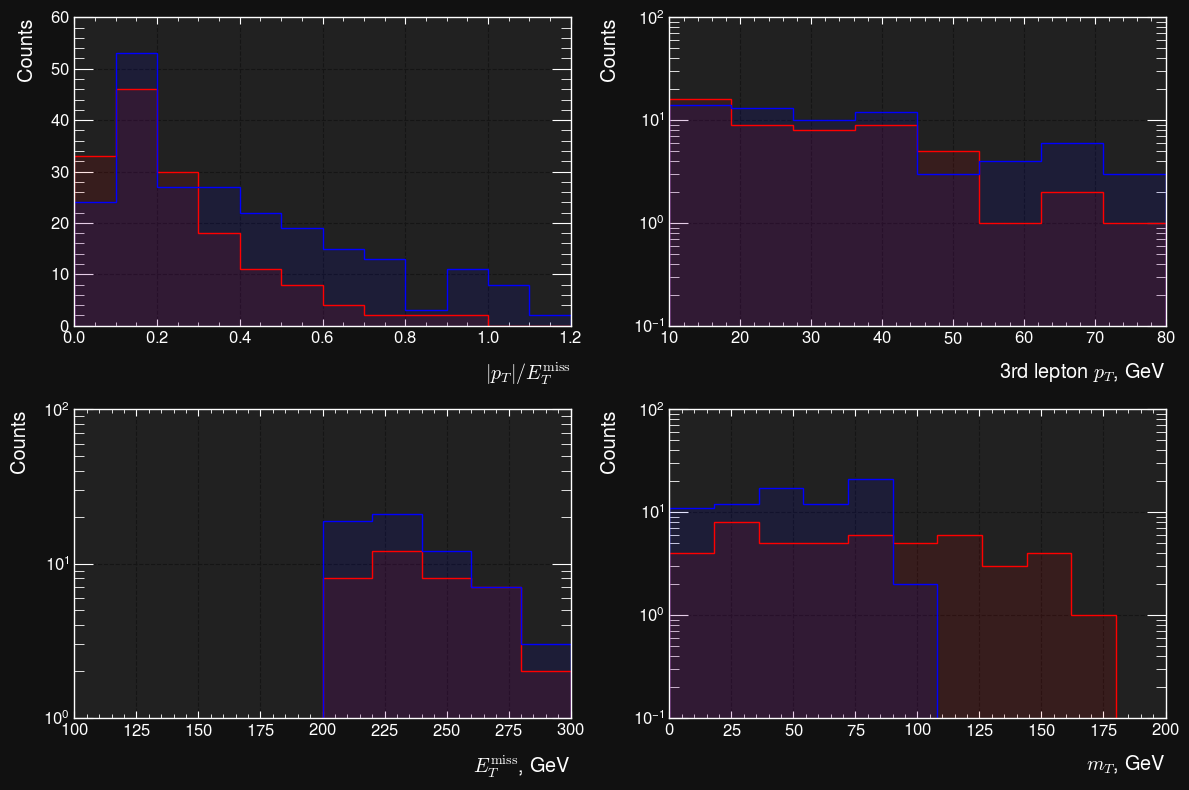

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

hist1, bins1, _ = ax[0, 0].hist(PT_MISS_ET_SIGNAL, color='r', histtype='step', bins=np.linspace(0, 1.2, 13))
hist2, bins2, _ = ax[0, 0].hist(PT_MISS_ET_BKG_WZ, color='b', histtype='step', bins=np.linspace(0, 1.2, 13))
hist1 = np.append(hist1, hist1[-1])
hist2 = np.append(hist2, hist2[-1])
ax[0, 0].fill_between(bins1, hist1, step='post', color='r', alpha=0.1)
ax[0, 0].fill_between(bins2, hist2, step='post', color='b', alpha=0.1)
ax[0, 0].set_xlabel(r'$|p_T|/E^\text{miss}_T$')
ax[0, 0].set_ylabel('Counts')

hist1, bins1, _ = ax[0, 1].hist(np.array(PT_LEP_SIGNAL)[:, 2], color='r', histtype='step', bins=np.linspace(10, 80, 9))
hist2, bins2, _ = ax[0, 1].hist(np.array(PT_LEP_BKG_WZ)[:, 2], color='b', histtype='step', bins=np.linspace(10, 80, 9))
hist1 = np.append(hist1, hist1[-1])
hist2 = np.append(hist2, hist2[-1])
ax[0, 1].fill_between(bins1, hist1, step='post', color='r', alpha=0.1)
ax[0, 1].fill_between(bins2, hist2, step='post', color='b', alpha=0.1)
ax[0, 1].set_xlabel(r'3rd lepton $p_T$, GeV')
ax[0, 1].set_ylabel('Counts')
ax[0, 1].set_yscale('log')

hist1, bins1, _ = ax[1, 0].hist(MISS_ET_SIGNAL, color='r', histtype='step', bins=np.linspace(100, 300, 11))
hist2, bins2, _ = ax[1, 0].hist(MISS_ET_BKG_WZ, color='b', histtype='step', bins=np.linspace(100, 300, 11))
hist1 = np.append(hist1, hist1[-1])
hist2 = np.append(hist2, hist2[-1])
ax[1, 0].fill_between(bins1, hist1, step='post', color='r', alpha=0.1)
ax[1, 0].fill_between(bins2, hist2, step='post', color='b', alpha=0.1)
ax[1, 0].set_xlabel(r'$E_T^\text{miss}$, GeV')
ax[1, 0].set_ylabel('Counts')
ax[1, 0].set_yscale('log')

hist1, bins1, _ = ax[1, 1].hist(T_MASS_SIGNAL, color='r', histtype='step', bins=np.linspace(0, 180, 11))
hist2, bins2, _ = ax[1, 1].hist(T_MASS_BKG_WZ, color='b', histtype='step', bins=np.linspace(0, 180, 11))
hist1 = np.append(hist1, hist1[-1])
hist2 = np.append(hist2, hist2[-1])
ax[1, 1].fill_between(bins1, hist1, step='post', color='r', alpha=0.1)
ax[1, 1].fill_between(bins2, hist2, step='post', color='b', alpha=0.1)
ax[1, 1].set_xlabel(r'$m_{T}$, GeV')
ax[1, 1].set_ylabel('Counts')
ax[1, 1].set_yscale('log')

fig.tight_layout()
plt.show()

In [ ]:
hist, bins, _ = plt.hist(INV_MASS, color='r', histtype='step', bins=np.linspace(50, 400, 100), label='$m_{ll}$', density=0)
hist2, bins, _ = plt.hist(T_MASS, color='b', histtype='step', bins=bins, label='$m_{T}$', density=0)
hist = np.append(hist, hist[-1])
hist2 = np.append(hist2, hist2[-1])
plt.fill_between(bins, hist, step='post', color='r', alpha=0.05)
plt.fill_between(bins, hist2, step='post', color='b', alpha=0.05)
plt.legend(fontsize=15)
plt.ylabel('Counts')
plt.show()

# Eventos Generados en MadGraph

Los procesos fueron generados a partir de las siguientes expresiones:

| Process | Expression |
|--------|----------|
| Signal + Background  | ```p p > x1+ n2 , (n2 > n1 z , z > l+ l-) , (x1+ > n1 w+ , w+ > l+ vl)``` |
| Background ZZ  | ```p p > z z , (z > l+ l-) , (z > l+ l-)``` |
| Background WZ  | ```p p > w z , (w > l vl) , (z > l+ l-)``` |
| Background ttZ  |  |
| Background ttW  |  |

(Con $W$ definido como ```define w = w+ w-```)

$$m_T = \sqrt{2\, p_T \, p_T^\text{miss} \, (1 - \cos(\phi_\text{miss} - \phi))}$$